# 概率统计方法

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#简介" data-toc-modified-id="简介-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>简介</a></span></li><li><span><a href="#概率分布" data-toc-modified-id="概率分布-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>概率分布</a></span></li><li><span><a href="#连续分布" data-toc-modified-id="连续分布-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>连续分布</a></span><ul class="toc-item"><li><span><a href="#正态分布" data-toc-modified-id="正态分布-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>正态分布</a></span></li><li><span><a href="#其他连续分布" data-toc-modified-id="其他连续分布-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>其他连续分布</a></span></li></ul></li><li><span><a href="#离散分布" data-toc-modified-id="离散分布-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>离散分布</a></span></li><li><span><a href="#自定义离散分布" data-toc-modified-id="自定义离散分布-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>自定义离散分布</a></span></li><li><span><a href="#假设检验" data-toc-modified-id="假设检验-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>假设检验</a></span><ul class="toc-item"><li><span><a href="#独立样本-t-检验" data-toc-modified-id="独立样本-t-检验-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>独立样本 t 检验</a></span></li><li><span><a href="#配对样本-t-检验" data-toc-modified-id="配对样本-t-检验-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>配对样本 t 检验</a></span></li><li><span><a href="#p-值计算原理" data-toc-modified-id="p-值计算原理-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>p 值计算原理</a></span></li></ul></li></ul></div>

## 简介

`Python` 中常用的统计工具有 `Numpy, Pandas, PyMC, StatsModels` 等。

`Scipy `中的子库 `scipy.stats` 中包含很多统计上的方法。

In [1]:
# 导入 numpy 和 matplotlib：
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
heights = array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])

In [4]:
print 'mean, ', heights.mean() # 平均值
print 'min, ', heights.min()
print 'max, ', heights.max()
print 'standard deviation, ', heights.std() # 标准偏差

mean,  1.7559999999999998
min,  1.46
max,  2.01
standard deviation,  0.15081114017207078


In [5]:
# 导入Scipy的统计模块
import scipy.stats.stats as st

In [11]:
# 其他统计量
print 'mode, ', st.mode(heights)           # 众数及其出现次数
print 'skewness, ', st.skew(heights)       # 偏度
print 'kurtosis, ', st.kurtosis(heights)   # 峰度
print 'and so many more...'

mode,  ModeResult(mode=array([1.88]), count=array([2]))
skewness,  -0.393524456473
kurtosis,  -0.330672097724
and so many more...


## 概率分布

常见的连续概率分布有：

* 均匀分布
* 正态分布
* 学生t分布
* F分布
* Gamma分布
* ...

离散概率分布：

* 伯努利分布
* 几何分布
* ...

这些都可以在 scipy.stats 中找到。

## 连续分布

### 正态分布

In [12]:
from scipy.stats import norm

它包含四类常用的函数：

* `norm.cdf` 返回对应的累计分布函数值
* `norm.pdf` 返回对应的概率密度函数值
* `norm.rvs` 产生指定参数的随机变量
* `norm.fit` 返回给定数据下，各参数的最大似然估计（MLE）值

In [13]:
# 从正态分布产生500个随机点：
x_norm = norm.rvs(size=500)
type(x_norm)

numpy.ndarray

counts,  [  8.  19.  54. 103. 121. 100.  56.  25.  12.   2.]
bin centers [-2.72296144 -2.11839739 -1.51383335 -0.90926931 -0.30470526  0.29985878
  0.90442282  1.50898687  2.11355091  2.71811495  3.322679  ]


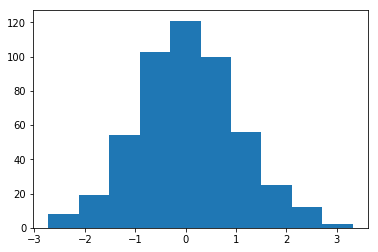

In [14]:
# 直方图
h = hist(x_norm)
print 'counts, ', h[0]
print 'bin centers', h[1]

d:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


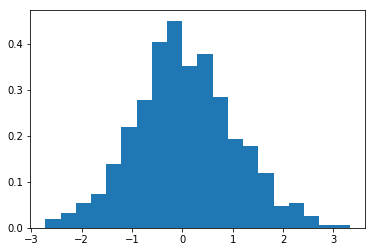

In [15]:
# 归一化直方图（用出现频率代替次数），将划分区间变为 20（默认 10）：
h = hist(x_norm, normed=True, bins=20)

In [16]:
# 在这组数据下，正态分布参数的最大似然估计值为
x_mean, x_std = norm.fit(x_norm)

print 'mean, ', x_mean
print 'x_std, ', x_std

mean,  0.053385159764994014
x_std,  1.0033905301052781


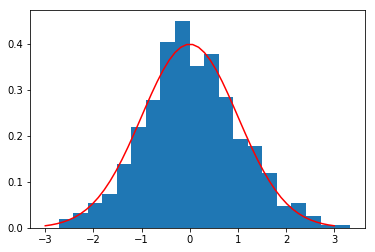

In [17]:
# 将真实的概率密度函数与直方图进行比较：
h = hist(x_norm, normed=True, bins=20)

x = linspace(-3,3,50)
p = plot(x, norm.pdf(x), 'r-')

In [18]:
from scipy.integrate import trapz 

95.45% of the values lie between -2 and 2


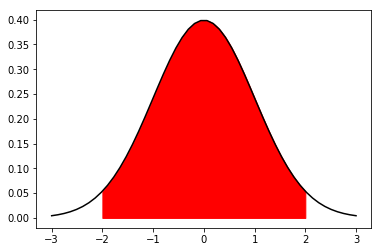

In [19]:
# 通过积分，计算落在某个区间的概率大小：
x1 = linspace(-2,2,108)
p = trapz(norm.pdf(x1), x1) 
print '{:.2%} of the values lie between -2 and 2'.format(p)

fill_between(x1, norm.pdf(x1), color = 'red')
plot(x, norm.pdf(x), 'k-')

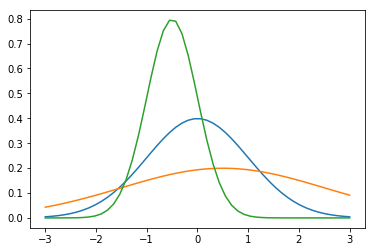

In [20]:
# 默认情况，正态分布的参数为均值0，标准差1，即标准正态分布。
# 可以通过 loc 和 scale 来调整这些参数
p = plot(x, norm.pdf(x, loc=0, scale=1))
p = plot(x, norm.pdf(x, loc=0.5, scale=2))
p = plot(x, norm.pdf(x, loc=-0.5, scale=.5))

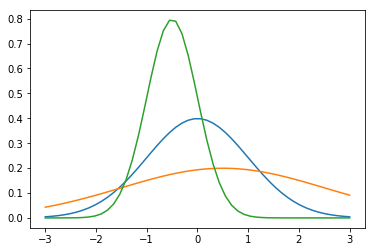

In [21]:
# 将 loc, scale 作为参数直接输给 norm 生成相应的分布：
p = plot(x, norm(loc=0, scale=1).pdf(x))
p = plot(x, norm(loc=0.5, scale=2).pdf(x))
p = plot(x, norm(loc=-0.5, scale=.5).pdf(x))

### 其他连续分布

In [22]:
from scipy.stats import lognorm, t, dweibull

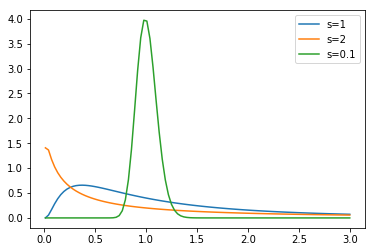

In [23]:
# 支持与 norm 类似的操作，如概率密度函数等。
# 对数正态分布：
x = linspace(0.01, 3, 100)

plot(x, lognorm.pdf(x, 1), label='s=1')
plot(x, lognorm.pdf(x, 2), label='s=2')
plot(x, lognorm.pdf(x, .1), label='s=0.1')

legend()

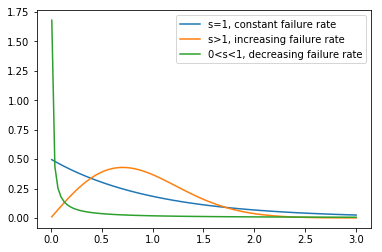

In [24]:
# 韦氏分布：
x = linspace(0.01, 3, 100)

plot(x, dweibull.pdf(x, 1), label='s=1, constant failure rate')
plot(x, dweibull.pdf(x, 2), label='s>1, increasing failure rate')
plot(x, dweibull.pdf(x, .1), label='0<s<1, decreasing failure rate')

legend()

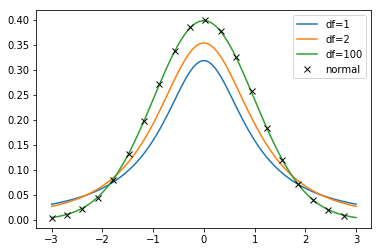

In [25]:
# 不同自由度的学生 t 分布
x = linspace(-3, 3, 100)

plot(x, t.pdf(x, 1), label='df=1')
plot(x, t.pdf(x, 2), label='df=2')
plot(x, t.pdf(x, 100), label='df=100')
plot(x[::5], norm.pdf(x[::5]), 'kx', label='normal')

legend()

## 离散分布

In [26]:
# 导入离散分布：
from scipy.stats import binom, poisson, randint

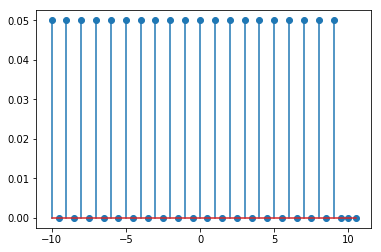

In [27]:
# 离散均匀分布的概率质量函数（PMF）：
high = 10
low = -10

x = arange(low, high+1, 0.5)
p = stem(x, randint(low, high).pmf(x))  # 杆状图

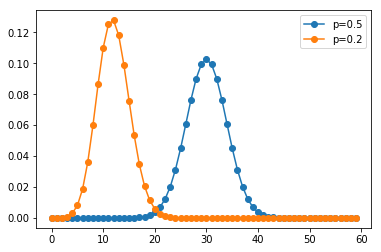

In [28]:
# 二项分布
num_trials = 60
x = arange(num_trials)

plot(x, binom(num_trials, 0.5).pmf(x), 'o-', label='p=0.5')
plot(x, binom(num_trials, 0.2).pmf(x), 'o-', label='p=0.2')

legend()

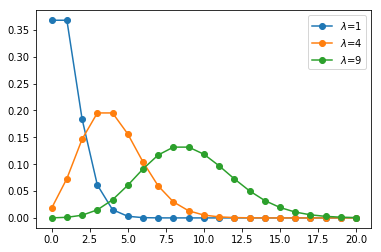

In [29]:
# 泊松分布：
x = arange(0,21)

plot(x, poisson(1).pmf(x), 'o-', label=r'$\lambda$=1')
plot(x, poisson(4).pmf(x), 'o-', label=r'$\lambda$=4')
plot(x, poisson(9).pmf(x), 'o-', label=r'$\lambda$=9')

legend()

## 自定义离散分布

In [30]:
# 导入要用的函数：
from scipy.stats import rv_discrete

In [31]:
xk = [1, 2, 3, 4, 5, 6]
pk = [.3, .35, .25, .05, .025, .025]

In [32]:
# 定义离散分布：
loaded = rv_discrete(values=(xk, pk))

In [33]:
# 产生两个服从该分布的随机变量：
loaded.rvs(size=2)

array([3, 4])

<StemContainer object of 3 artists>

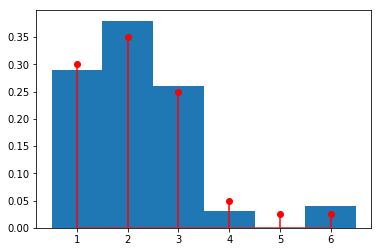

In [34]:
# 产生100个随机变量，将直方图与概率质量函数进行比较：
samples = loaded.rvs(size=100)
bins = linspace(.5,6.5,7)

hist(samples, bins=bins, normed=True)
stem(xk, loaded.pmf(xk), markerfmt='ro', linefmt='r-')

## 假设检验

导入相关的函数：

* 正态分布
* 独立双样本 t 检验，配对样本 t 检验，单样本 t 检验
* 学生 t 分布

In [35]:
from scipy.stats import norm
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import t

### 独立样本 t 检验

In [36]:
# 独立样本 t 检验
n1 = norm(loc=0.3, scale=1.0)
n2 = norm(loc=0, scale=1.0)

In [37]:
# 从分布中产生两组随机样本：
n1_samples = n1.rvs(size=100)
n2_samples = n2.rvs(size=100)

In [38]:
# 将两组样本混合在一起：
samples = hstack((n1_samples, n2_samples))

In [39]:
# 最大似然参数估计：
loc, scale = norm.fit(samples)
n = norm(loc=loc, scale=scale)

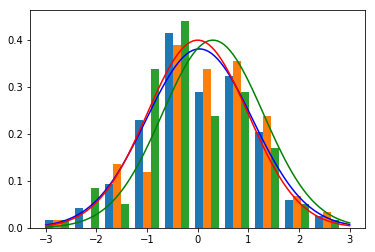

In [40]:
# 比较
x = linspace(-3,3,100)

hist([samples, n1_samples, n2_samples], normed=True)
plot(x, n.pdf(x), 'b-')
plot(x, n1.pdf(x), 'g-')
plot(x, n2.pdf(x), 'r-')

In [41]:
# 独立双样本 t 检验的目的在于判断两组样本之间是否有显著差异：
t_val, p = ttest_ind(n1_samples, n2_samples)

print 't = {}'.format(t_val)
print 'p-value = {}'.format(p)

# p 值小，说明这两个样本有显著性差异。

t = 2.43801781117
p-value = 0.0156504731204


### 配对样本 t 检验

配对样本指的是两组样本之间的元素一一对应

In [42]:
# 假设我们有一组病人的数据
pop_size = 35

pre_treat = norm(loc=0, scale=1)
n0 = pre_treat.rvs(size=pop_size)

In [43]:
# 经过某种治疗后，对这组病人得到一组新的数据：
effect = norm(loc=0.05, scale=0.2)
eff = effect.rvs(size=pop_size)

n1 = n0 + eff

In [44]:
# 新数据的最大似然估计：
loc, scale = norm.fit(n1)
post_treat = norm(loc=loc, scale=scale)

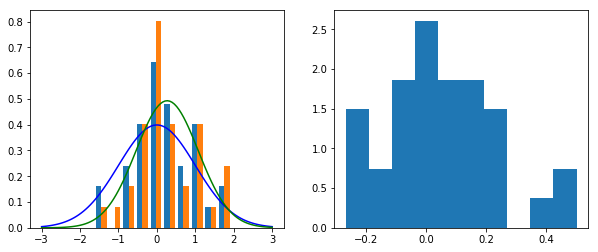

In [45]:
# 画图：
fig = figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
h = ax1.hist([n0, n1], normed=True)
p = ax1.plot(x, pre_treat.pdf(x), 'b-')
p = ax1.plot(x, post_treat.pdf(x), 'g-')

ax2 = fig.add_subplot(1,2,2)
h = ax2.hist(eff, normed=True)

In [46]:
# 独立 t 检验：
t_val, p = ttest_ind(n0, n1)

print 't = {}'.format(t_val)
print 'p-value = {}'.format(p)
# 高 p 值说明两组样本之间没有显著性差异。

t = -0.280714950057
p-value = 0.779781364637


In [47]:
# 配对 t 检验：
t_val, p = ttest_rel(n0, n1)

print 't = {}'.format(t_val)
print 'p-value = {}'.format(p)

t = -1.75300842993
p-value = 0.0886141075918


配对 t 检验的结果说明，配对样本之间存在显著性差异，说明治疗时有效的，符合我们的预期。

### p 值计算原理

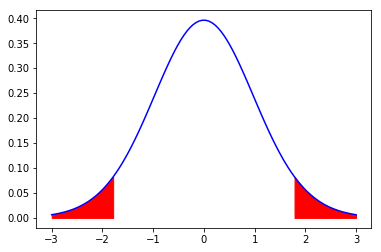

In [48]:
# p 值对应的部分是下图中的红色区域，边界范围由 t 值决定。
my_t = t(pop_size) # 传入参数为自由度，这里自由度为50

p = plot(x, my_t.pdf(x), 'b-')
lower_x = x[x<= -abs(t_val)]
upper_x = x[x>= abs(t_val)]

p = fill_between(lower_x, my_t.pdf(lower_x), color='red')
p = fill_between(upper_x, my_t.pdf(upper_x), color='red')